✅ [1] Loaded image from URL
✅ [2] Converted image from BGR to RGB


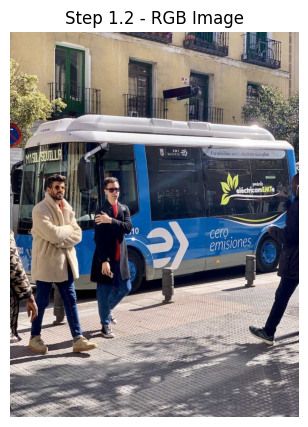

✅ [3] Resized image to 640x640


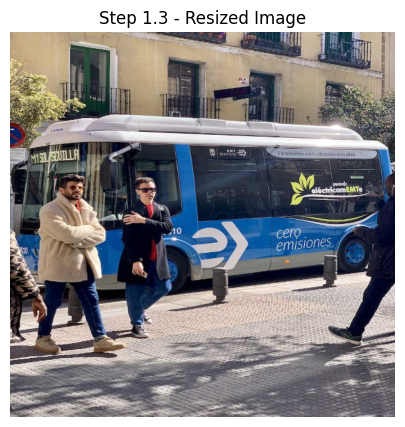

✅ [4] Normalized image | pixel range: 0.00 to 1.00


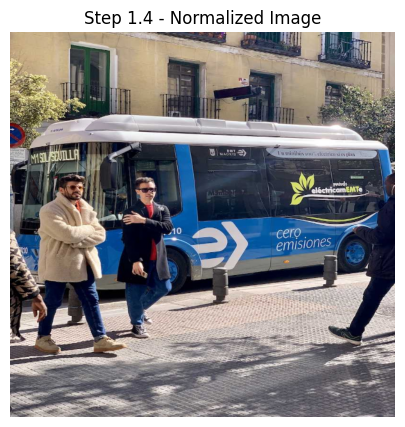

✅ [5] Converted image to PyTorch Tensor | shape: torch.Size([1, 3, 640, 640])
🧠 Loading YOLOv8 model...
✅ Model loaded!
🔍 Running inference...

0: 640x640 4 persons, 1 bus, 30.1ms
Speed: 3.1ms preprocess, 30.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
✅ Inference complete!


c:\Users\BMEi\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


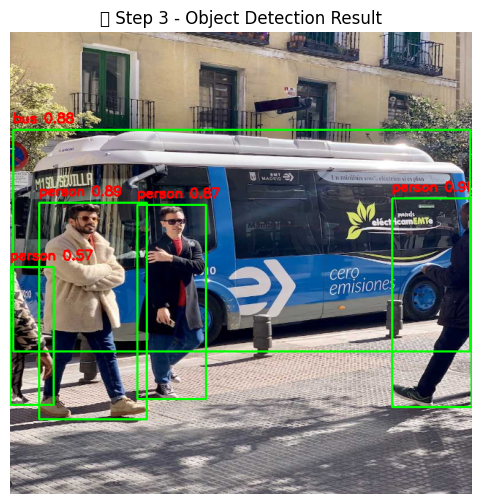


📊 Step 4 - Detected Objects Table
    Class  Confidence   X1   Y1   X2   Y2
0  person       0.895  529  230  639  519
1  person       0.888   40  236  189  536
2     bus       0.879    4  135  637  442
3  person       0.869  176  239  271  508
4  person       0.566    0  325   60  516


c:\Users\BMEi\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


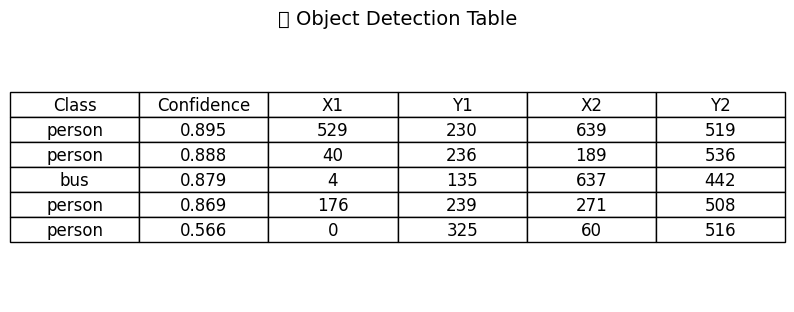

c:\Users\BMEi\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


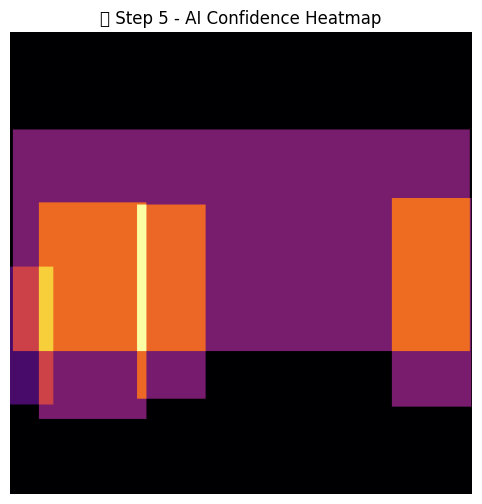

🧬 Step 6 - Capturing CNN feature maps...

0: 640x640 4 persons, 1 bus, 24.8ms
Speed: 3.4ms preprocess, 24.8ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


C:\Users\BMEi\AppData\Local\Temp\ipykernel_29804\1069522062.py:150: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\BMEi\Documents\GitHub\WORK\Windows\CODE_BME\PROJECT_MALARIA\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


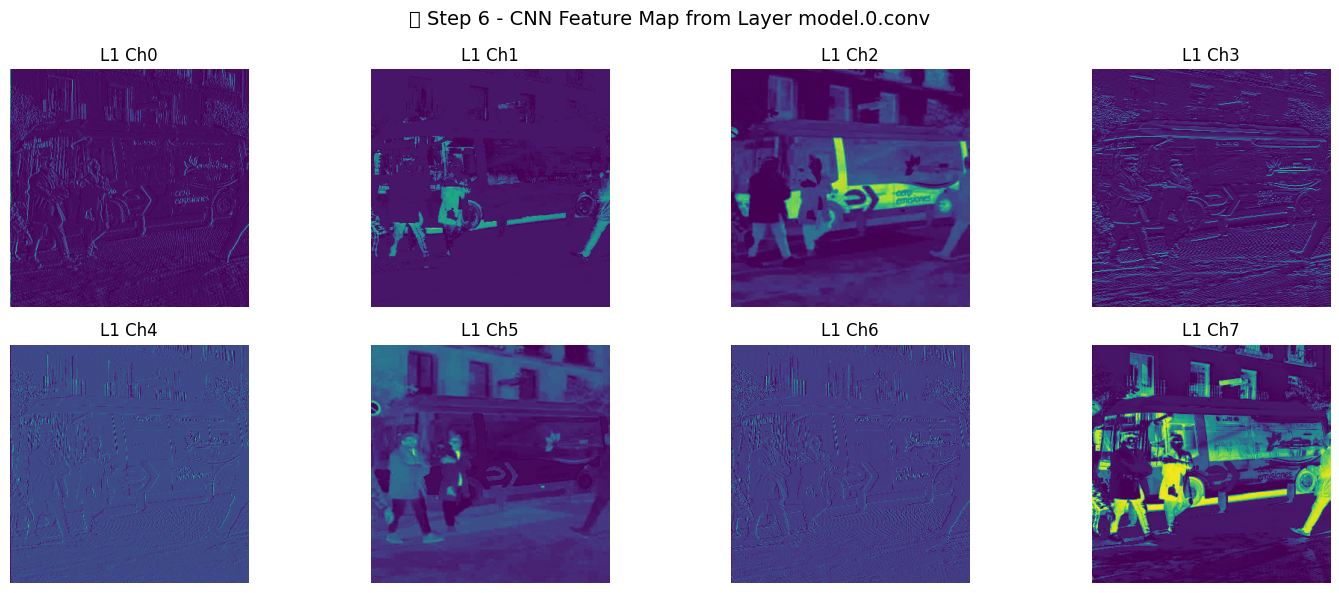

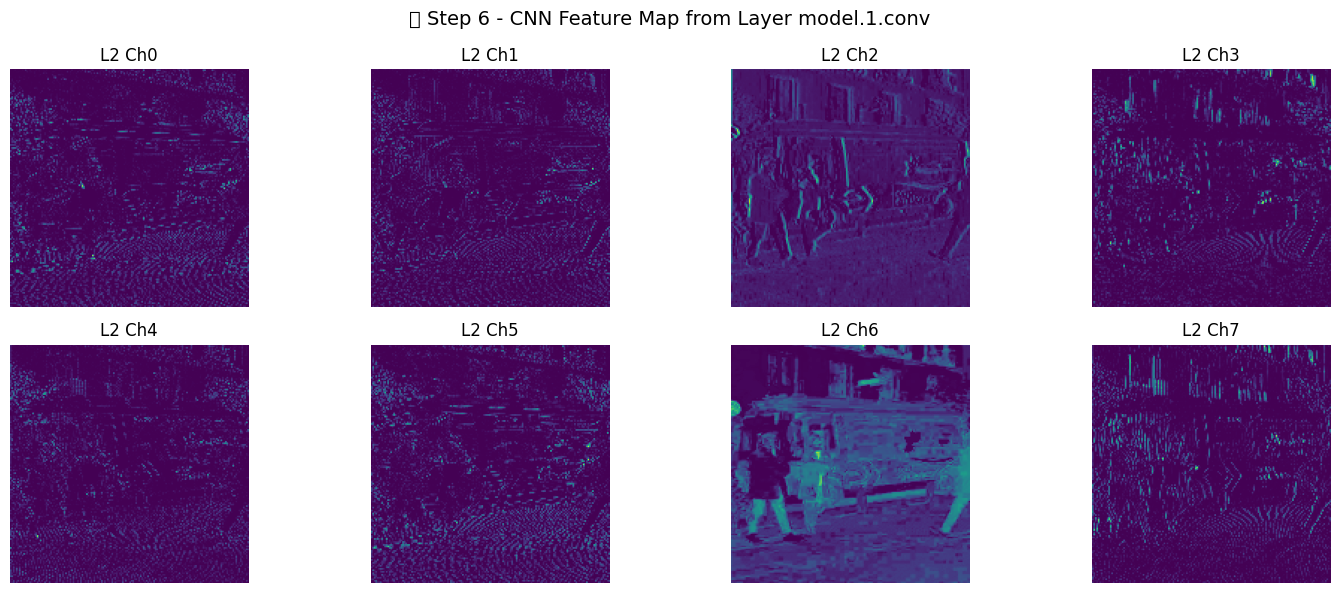

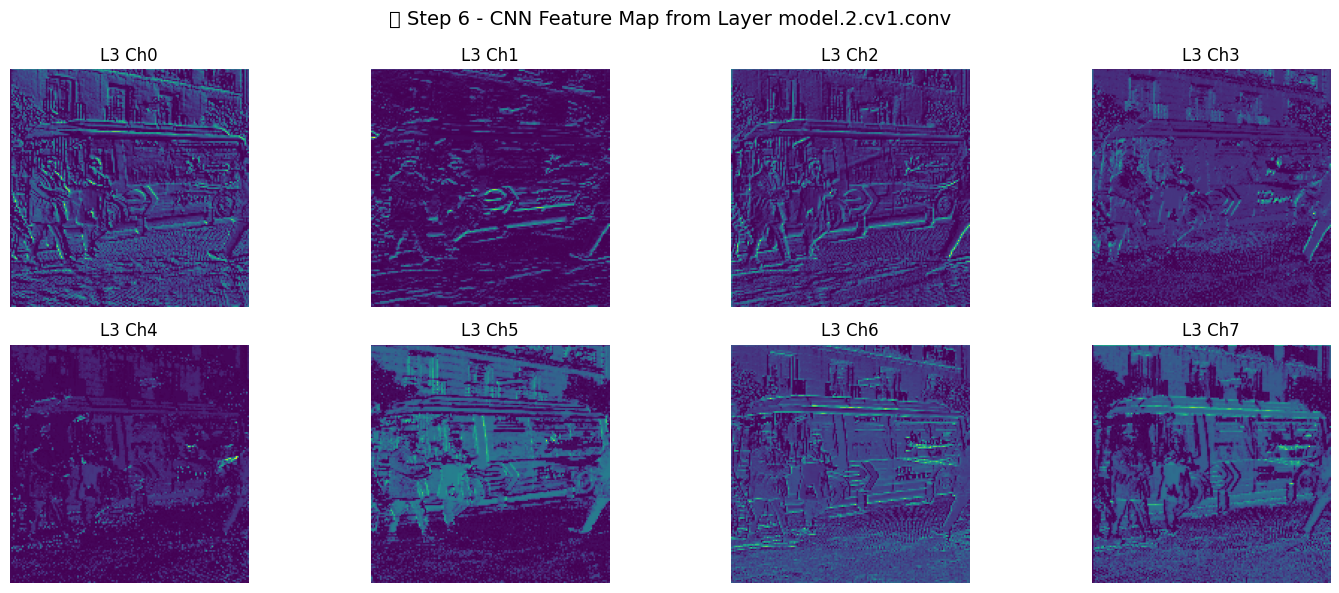

🔥 Step 7 - Activation Map (approx Grad-CAM)

0: 640x640 4 persons, 1 bus, 23.3ms
Speed: 4.2ms preprocess, 23.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


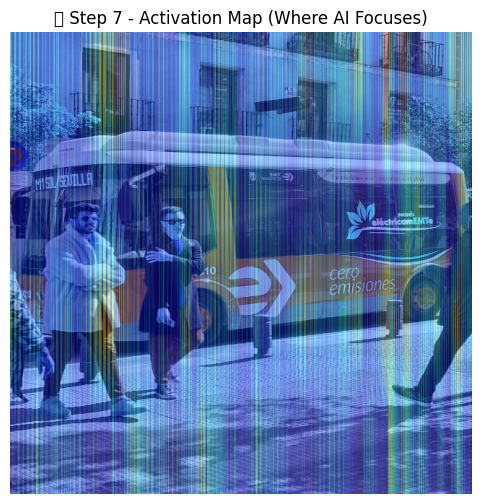

In [6]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from ultralytics import YOLO
import pandas as pd
import matplotlib.cm as cm

# Step 1.1: Load image from URL
url = 'https://ultralytics.com/images/bus.jpg'
image_path = 'bus.jpg'
urllib.request.urlretrieve(url, image_path)

print("✅ [1] Loaded image from URL")
image_bgr = cv2.imread(image_path)

# Step 1.2: Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
print("✅ [2] Converted image from BGR to RGB")

plt.figure(figsize=(8, 5))
plt.title("Step 1.2 - RGB Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Step 1.3: Resize to 640x640
image_resized = cv2.resize(image_rgb, (640, 640))
print("✅ [3] Resized image to 640x640")

plt.figure(figsize=(8, 5))
plt.title("Step 1.3 - Resized Image")
plt.imshow(image_resized)
plt.axis('off')
plt.show()

# Step 1.4: Normalize (0–255 → 0–1)
image_normalized = image_resized / 255.0
print(f"✅ [4] Normalized image | pixel range: {image_normalized.min():.2f} to {image_normalized.max():.2f}")

plt.figure(figsize=(8, 5))
plt.title("Step 1.4 - Normalized Image")
plt.imshow(image_normalized)
plt.axis('off')
plt.show()

# Step 1.5: Convert to PyTorch Tensor and rearrange dims
image_tensor = torch.tensor(image_normalized, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
print(f"✅ [5] Converted image to PyTorch Tensor | shape: {image_tensor.shape}")

# Step 2: Load YOLOv8 model
print("🧠 Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')
print("✅ Model loaded!")

# Step 3: Run Inference
print("🔍 Running inference...")
results = model(image_tensor)
print("✅ Inference complete!")

# Step 4: Draw bounding boxes
image_detected = image_resized.copy()
detected_data = []
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    confs = result.boxes.conf.cpu().numpy()
    clses = result.boxes.cls.cpu().numpy().astype(int)
    names = model.names

    for box, conf, cls in zip(boxes, confs, clses):
        x1, y1, x2, y2 = map(int, box)
        label = f"{names[cls]} {conf:.2f}"
        cv2.rectangle(image_detected, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_detected, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        detected_data.append({
            "Class": names[cls],
            "Confidence": round(float(conf), 3),
            "X1": int(x1), "Y1": int(y1), "X2": int(x2), "Y2": int(y2)
        })

# Show detected image
plt.figure(figsize=(10, 6))
plt.title("🎯 Step 3 - Object Detection Result")
plt.imshow(image_detected)
plt.axis('off')
plt.show()

# Step 5: Show detection table
df = pd.DataFrame(detected_data)
print("\n📊 Step 4 - Detected Objects Table")
print(df)

fig, ax = plt.subplots(figsize=(10, len(df)*0.5 + 1))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
plt.title("📋 Object Detection Table", fontsize=14)
plt.show()

# Step 6: Confidence Heatmap
heatmap = np.zeros((640, 640))
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    confs = result.boxes.conf.cpu().numpy()
    for box, conf in zip(boxes, confs):
        x1, y1, x2, y2 = map(int, box)
        heatmap[y1:y2, x1:x2] += conf
heatmap = np.clip(heatmap / np.max(heatmap), 0, 1)
colored_heatmap = cm.inferno(heatmap)[:, :, :3]

plt.figure(figsize=(10, 6))
plt.title("🔥 Step 5 - AI Confidence Heatmap")
plt.imshow(colored_heatmap)
plt.axis('off')
plt.show()

# Step 7: Show feature maps from CNN layers
print("🧬 Step 6 - Capturing CNN feature maps...")
feature_maps = []
hook_layers = []
layer_names = []

for i, (name, layer) in enumerate(model.model.named_modules()):
    if isinstance(layer, torch.nn.Conv2d) and i < 15:
        def get_hook(): return lambda m, inp, out: feature_maps.append(out)
        handle = layer.register_forward_hook(get_hook())
        hook_layers.append(handle)
        layer_names.append(name)

# Forward pass again to capture features
_ = model(image_tensor)
for h in hook_layers: h.remove()

# Show 3 layers and 8 channels per layer
num_layers_to_show = min(3, len(feature_maps))
channels_per_layer = 8

for i in range(num_layers_to_show):
    fmap = feature_maps[i].squeeze(0)  # Remove batch dim
    plt.figure(figsize=(15, 6))
    for ch in range(min(channels_per_layer, fmap.shape[0])):
        plt.subplot(2, 4, ch + 1)
        plt.imshow(fmap[ch].cpu().numpy(), cmap='viridis')
        plt.title(f"L{i+1} Ch{ch}")
        plt.axis('off')
    plt.suptitle(f"🧠 Step 6 - CNN Feature Map from Layer {layer_names[i]}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Step 8: Grad-CAM - Show where AI focuses most
print("🔥 Step 7 - Activation Map (approx Grad-CAM)")

# Hook last Conv2D layer
last_feature = None
for name, layer in list(model.model.named_modules())[::-1]:
    if isinstance(layer, torch.nn.Conv2d):
        def hook_fn(module, input, output):
            global last_feature
            last_feature = output
        layer.register_forward_hook(hook_fn)
        break

# Run model again to get activation
_ = model(image_tensor)

# Use mean across channels as activation heatmap
act_map = last_feature.squeeze(0).mean(0).cpu().numpy()
act_map = np.maximum(act_map, 0)
act_map -= act_map.min()
act_map /= act_map.max()

# Resize to match image
act_map_resized = cv2.resize(act_map, (640, 640))
act_map_colored = cv2.applyColorMap(np.uint8(255 * act_map_resized), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(image_resized, 0.6, act_map_colored, 0.4, 0)

# Show activation overlay
plt.figure(figsize=(10, 6))
plt.title("🔥 Step 7 - Activation Map (Where AI Focuses)")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()